## Experiment 8: Support Vector Machine
## Nikita Chitre
## Roll No 4
## Batch A

Objectives: Understanding Support Vector Machine algorithm through building SVM algorithm in Python

*   Support Vector Machine model has hyperparameters such as Cost and Kernel mode. 
*   In this notebook, we will see how different values of Cost parameter affect the model performance and decision boundary.
*   Also, we will use different kernel modes such as Linear, RBF and Poly and see how it affects the decision boundary. 

In [49]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
  y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)

  # Support vectors indicated in plot by vertical lines
  sv = svc.support_vectors_
  plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1') 
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max) 
  plt.xlabel('X1')
  plt.ylabel('X2') 
  plt.show()
  print('Number of support vectors: ', svc.support_.size)

In [3]:
from sklearn.svm import SVC

In [4]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)

X[y == -1] = X[y == -1]+1

Let’s plot the data to see whether the classes are linearly separable:

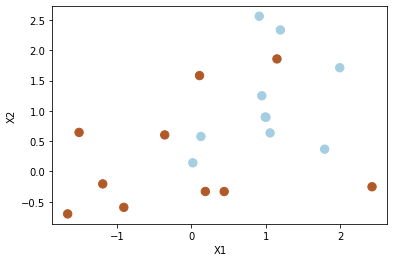

In [5]:
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired) 
plt.xlabel('X1')
_ = plt.ylabel('X2')

### Are the classes linearly separable? 

We can see from the scatterplot that the classes are not linearly separable. 

Next, we fit the support vector classifier

In [6]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X, y)

SVC(C=1, kernel='linear')

We can now plot the support vector classifier by calling the plot_svc() function on the output of the call to SVC(), as well as the data used in the call to SVC():

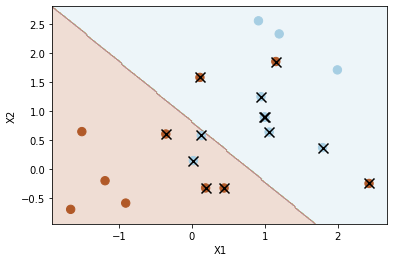

Number of support vectors:  13


In [7]:
plot_svc(svc, X, y)

### How many support vectors are there? 

*   From the plot we can see that the decision boundary between the two classes is linear. This is because, we have used kernel = 'linear' argument while fitting the model.
*   The +1 class is shown in brown and -1 class is shown in blue. 
*   The crosses indicate the support vectors.
*   There are 13 support vectors. However, looking at the plot, it appears that there are twelve. This is because two crosses are overlapped over each other. 




 


We can print the support vectors as follows:

In [8]:
svc.support_vectors_

array([[ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [ 0.18760323, -0.32986996],
       [-0.35882895,  0.6034716 ],
       [ 1.15139101,  1.85733101]])

In [9]:
svc.support_

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

The above array indicates the identities of the support vectors. 

### What if we instead used a smaller value of the cost parameter?

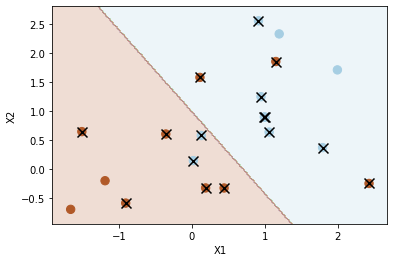

Number of support vectors:  16


In [10]:
svc2 = SVC(C=0.1, kernel='linear') 
svc2.fit(X, y)
plot_svc(svc2, X, y)

We can see that now we obtain 16 support vectors. Since we used smaller value of the C paramter, we get more number of support vectors because margin is wider now. 

Next we will perform 10-fold cross-validation to compare SVMs with a linear kernel, using a range of values of the cost parameter:

In [11]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [12]:
clf.best_estimator_

SVC(C=0.001, kernel='linear')

In [13]:
clf.best_params_

{'C': 0.001}

We can see that best paramter is C=0.001 

In [14]:
clf.best_score_

0.8

We can see that mean cross-validated score of the best_estimator is 80%

Let’s generate a test data set:

In [15]:
np.random.seed(1)
X_test = np.random.randn(20,2) 
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

Now we predict the class labels of these test observations. Here we use the best model obtained through cross-validation in order to make predictions:

In [19]:
svc2 = SVC(C=0.001, kernel='linear', probability=True)
svc2.fit(X, y)

SVC(C=0.001, kernel='linear', probability=True)

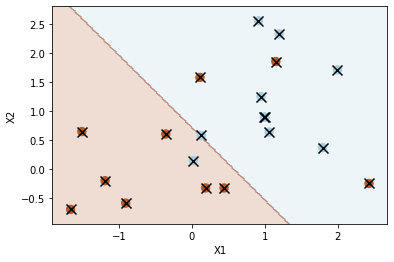

Number of support vectors:  20


In [20]:
plot_svc(svc2, X, y)

We can see that now we obtain 20 support vectors. Since we used very small value of the C paramter, we get more number of support vectors because margin is wider now. 

In [21]:
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=svc2.classes_)

,-1,1
-1,2,6
1,0,12


From the confusion matrix, we can see that for value of c = 0.001 , 14 of the test observations are correctly classified.

In [17]:
print(f'Accuracy of testing dataset: {accuracy_score(y_test, y_pred) * 100} %')

Accuracy of testing dataset: 70.0 %


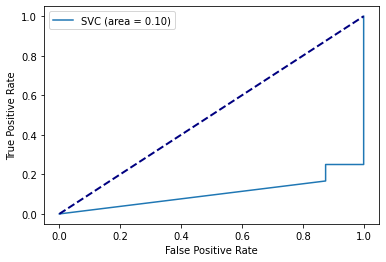

In [ ]:
y_pred_proba = svc2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

We see, we obtain an auc score of 0.1

### Now consider a situation in which the two classes are linearly separable. 
Then we can find a separating hyperplane using the  svm()  function. 
First we'll give our simulated data a little nudge so that they are linearly separable:

Text(0, 0.5, 'X2')

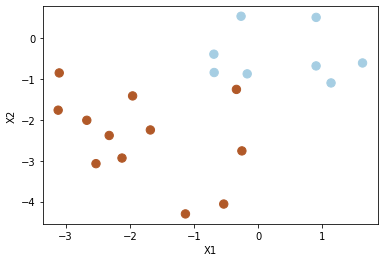

In [ ]:
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

We can see that the observations are just  linearly separable. We fit the support vector classifier and plot the resulting hyperplane, using a very large value of  cost  so that no observations are misclassified.

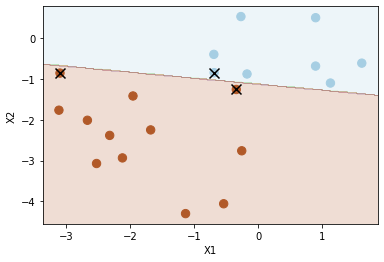

Number of support vectors:  3


In [ ]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

*   We can see that only three support vectors were used and no training errors were made. 
*   However, we can see that the margin is very narrow because observations which are not support vectors are very close to decision boundary. 
*   It is likely that model will perform poorly on testing data. 





Let's try a smaller value of  cost :

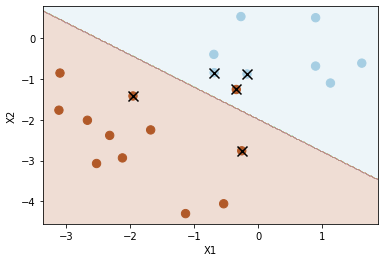

Number of support vectors:  5


In [ ]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

*   When we use Cost = 1, we misclassify a training observation.
*   However, we obtain a much wider margin and we make use of 5 support vectors. 
*   It is likely that model will perform better on testing data than the model with higher cost.





### Support Vector Machine using Non Linear Kernel
Now we use a different value of the parameter kernel. To fit an SVM with a polynomial kernel we use  kernel="poly" , and to fit an SVM with a radial kernel we use  kernel="rbf" . 

Let's generate some data with a non-linear class boundary:

Text(0, 0.5, 'X2')

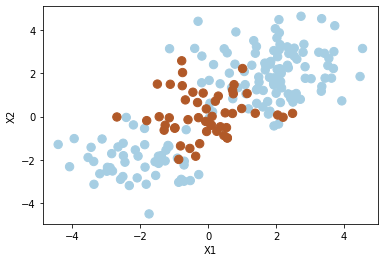

In [ ]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

We can see that one class is somewhat stuck in the middle of another class.  This suggests that we might want to use a radial kernel in our SVM. 

#### What is no. of support vectors for C=1?

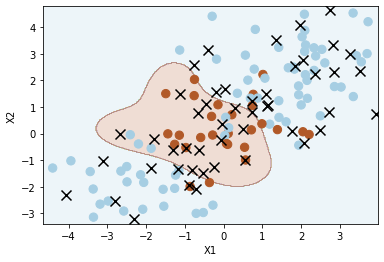

Number of support vectors:  51


In [ ]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

*   The plot shows that the resulting SVM has a decidedly non-linear boundary. 
*   From the figure we can see that there are a fair number of training errors in this SVM fit. 
*   If we increase the value of cost, we can reduce the number of training errors





#### What is no. of support vectors for C=100?

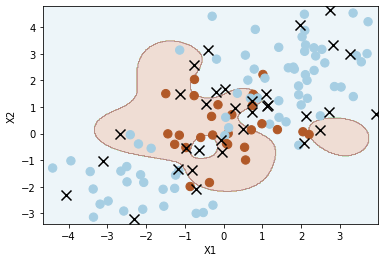

Number of support vectors:  36


In [ ]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

However here we get a more irregular decision boundary that is at a risk of overfitting the data. 

We can perform cross-validation using  GridSearchCV()  to select the best choice of  γ  and cost for an SVM with a radial kernel

In [ ]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.5}

We see that the best choice of parameters involves C=10 and gamma = 0.5

#### What is no. of support vectors for C=10?

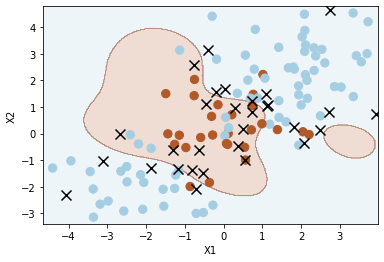

Number of support vectors:  32
[[66  7]
 [ 6 21]]
0.87


In [ ]:
plot_svc(clf.best_estimator_, X_test, y_test)
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

We see that 87% of test observations are correctly classified by this SVM. 

Now, Lets use the parameters obtained from grid search cv and fit the SVM model

In [ ]:
svm3 = SVC(C=10, kernel='rbf',gamma= 0.5, probability=True)
svm3.fit(X_train, y_train)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svm3.classes_, columns=svm3.classes_)

,-1,1
-1,45,28
1,11,16


We see that for value of C = 10 , 81 of the test observations are correctly classified.

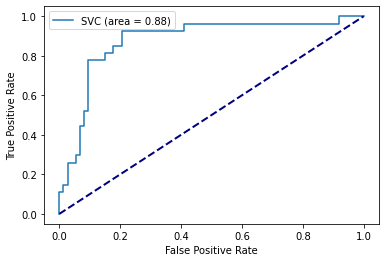

In [ ]:
y_pred_proba = svm3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

We see, we obtain an auc score of 0.88 which is better than the linear kernel SVM

## Pulsar Classification

In [22]:
# reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Pulsar.csv')

In [23]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [25]:
df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

We can see that there are no NULL values in this dataset

In [26]:
X = df.drop(['Class'], axis=1)
y = df['Class']

Spliting the data into train test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Class'], test_size=0.2, random_state=44)

#### First, we will fit the model using a linear kernel

In [ ]:
svc = SVC(C=1, kernel='linear') 
svc.fit(X_train, y_train)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred) * 100):.2f} %')

Accuracy Score: 97.74 %


We see that we obtain an accuracy of 97.74% on linear kernel with C=1

In [ ]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [ 0.1, 1, 5]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy', verbose = 2)
clf.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time=   4.5s
[CV] END ..............................................C=0.1; total time=   5.3s
[CV] END ..............................................C=0.1; total time=   4.6s
[CV] END ..............................................C=0.1; total time=   4.3s
[CV] END ..............................................C=0.1; total time=   3.9s
[CV] END ................................................C=1; total time=  23.5s
[CV] END ................................................C=1; total time=  30.5s
[CV] END ................................................C=1; total time=  24.5s
[CV] END ................................................C=1; total time=  24.7s
[CV] END ................................................C=1; total time=  21.9s
[CV] END ................................................C=5; total time= 1.4min
[CV] END ........................................

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.1, 1, 5]}], scoring='accuracy', verbose=2)

In [ ]:
clf.best_params_

{'C': 5}

In [ ]:
clf.best_estimator_

SVC(C=5, kernel='linear')

In [39]:
svc1 = SVC(C=5, kernel='linear', probability=True) 
svc1.fit(X_train, y_train)

SVC(C=5, kernel='linear', probability=True)

In [40]:
y_pred1 = svc1.predict(X_test)

In [41]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred1) * 100):.2f} %')

Accuracy Score: 97.79 %


In [ ]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [ 0.1, 1, 5]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='accuracy', verbose = 2)
clf.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time=   1.5s
[CV] END ..............................................C=0.1; total time=   1.4s
[CV] END ..............................................C=0.1; total time=   1.5s
[CV] END ..............................................C=0.1; total time=   1.4s
[CV] END ..............................................C=0.1; total time=   1.5s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.3s
[CV] END ................................................C=1; total time=   1.3s
[CV] END ................................................C=5; total time=   1.2s
[CV] END ........................................

GridSearchCV(cv=5, estimator=SVC(), param_grid=[{'C': [0.1, 1, 5]}],
             scoring='accuracy', verbose=2)

In [ ]:
clf.best_params_

{'C': 5}

In [ ]:
clf.best_estimator_

SVC(C=5)

In [42]:
svc2 = SVC(C=5, kernel='rbf',probability=True) 
svc2.fit(X_train, y_train)

SVC(C=5, probability=True)

In [43]:
y_pred2 = svc2.predict(X_test)

In [44]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred2) * 100):.2f} %')

Accuracy Score: 97.46 %


In [ ]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [ 0.1, 1, 5]}]
clf = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=5, scoring='accuracy', verbose = 2)
clf.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time=   1.8s
[CV] END ..............................................C=0.1; total time=   1.5s
[CV] END ..............................................C=0.1; total time=   1.2s
[CV] END ..............................................C=0.1; total time=   1.1s
[CV] END ..............................................C=0.1; total time=   1.1s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.2s
[CV] END ................................................C=1; total time=   1.0s
[CV] END ................................................C=5; total time=   1.7s
[CV] END ........................................

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid=[{'C': [0.1, 1, 5]}], scoring='accuracy', verbose=2)

In [ ]:
clf.best_params_

{'C': 5}

In [ ]:
clf.best_estimator_

SVC(C=5, kernel='poly')

In [45]:
svc3 = SVC(C=5, kernel='poly',probability=True) 
svc3.fit(X_train, y_train)

SVC(C=5, kernel='poly', probability=True)

In [46]:
y_pred3 = svc3.predict(X_test)

In [47]:
print(f'Accuracy Score: {(accuracy_score(y_test,y_pred3) * 100):.2f} %')

Accuracy Score: 97.12 %


We can see that we obtain highest accuracy with Linear SVM. This may be because the data has linear class boundary

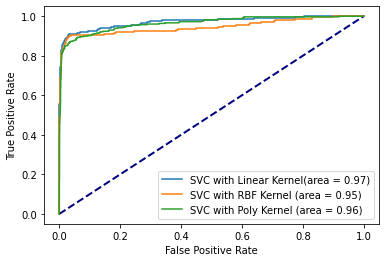

In [48]:
y_pred_proba_svc1 = svc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_svc1)
roc_auc = auc(fpr, tpr)

#create ROC curve
plt.plot(fpr,tpr, label='SVC with Linear Kernel(area = %0.2f)' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

y_pred_proba_svc2 = svc2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_svc2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, label='SVC with RBF Kernel (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color="navy",lw=2,linestyle="--")


y_pred_proba_svc3 = svc3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_svc3)
roc_auc = auc(fpr, tpr)
plt.plot(fpr,tpr, label='SVC with Poly Kernel (area = %0.2f)' % roc_auc)


plt.legend()
plt.show()

*   We can see that SVC with Linear Kernel had the highest AUC = 0.97 followed by Polynomial kernel and RBF Kernel. 
*   This might be due to the fact that the data has linearly separable classes



To check if the data has linearly separable classes, let's plot  scatterplots and check class separation

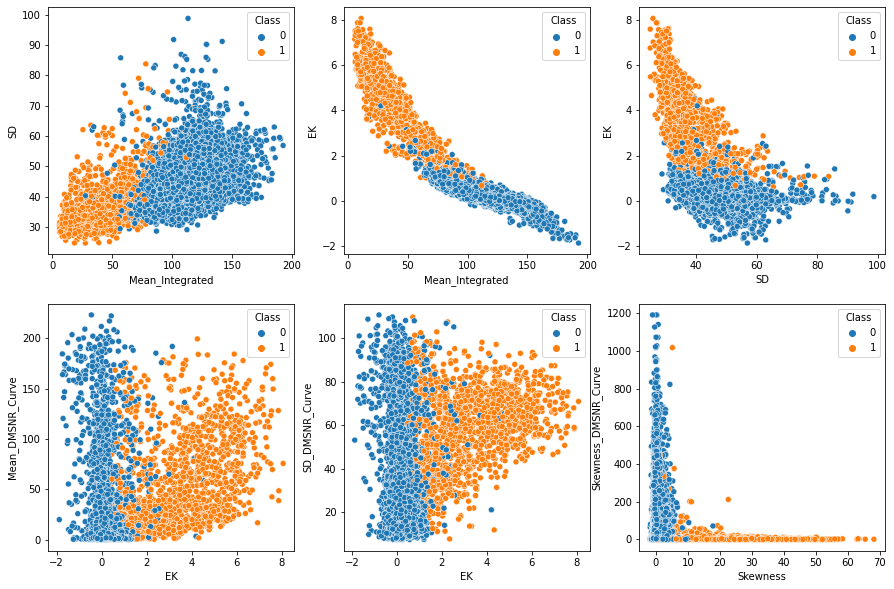

In [75]:
_ =plt.figure(figsize=(15,10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=df,x='Mean_Integrated',y='SD',hue = 'Class')
plt.subplot(2, 3, 2)
sns.scatterplot(data=df,x='Mean_Integrated',y='EK',hue = 'Class')
plt.subplot(2, 3, 3)
sns.scatterplot(data=df,x='SD',y='EK',hue = 'Class')
plt.subplot(2, 3, 4)
sns.scatterplot(data=df,x='EK',y='Mean_DMSNR_Curve',hue = 'Class')
plt.subplot(2, 3, 5)
sns.scatterplot(data=df,x='EK',y='SD_DMSNR_Curve',hue = 'Class')
plt.subplot(2, 3, 6)
sns.scatterplot(data=df,x='Skewness',y='Skewness_DMSNR_Curve',hue = 'Class')

We can see that the class are fairly linearly separable. This explains why Linear Kernel SVM had the highest performance. 

### Conclusion
*   The performance of SVC depends on value of Cost parameter and Kernel mode. 
*   For smaller value of Cost paramter, we get a  wider margin and more number of support vectors. 
*   For larger value of Cost paramter, we get a  narrow margin and less number of support vectors. Since the margin is narror, the model can lead to overfitting.
*   Linear kernel should be used for data in which classes are linear separable. 
*   For data in which class separation is non linear, a non linear kernel should be used.






